In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import pickle
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Sir Qasim Project/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288065 entries, 0 to 288064
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   package_name  288065 non-null  object
 1   review        288065 non-null  object
 2   date          288065 non-null  object
 3   star          288065 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


In [ ]:
df = df.head(50000)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['star'] = labelencoder.fit_transform(df['star'])

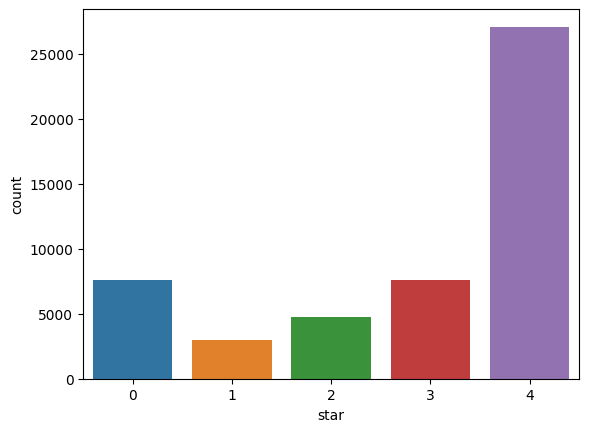

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='star', data=df)
plt.show()


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00


In [ ]:
# Define the hyperparameters
learning_rate = 2e-5
batch_size = 16
epochs = 10
num_labels = 5
attention_heads = 12
gradient_accumulation_steps = 16
hidden_size = 768
hidden_layers = 12
max_seq_length = 256
num_params = 110_000_000



In [ ]:
import torch

In [ ]:
from transformers import BertTokenizer

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader


In [ ]:
# # Split the dataset into training and testing sets
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Tokenize the input data using the BERT tokenizer for training set
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# train_input_ids = []
# train_attention_masks = []
# for sentence in train_df['review']:
#     encoded_dict = tokenizer.encode_plus(
#                         sentence,
#                         add_special_tokens = True,
#                         max_length = max_seq_length,
#                         pad_to_max_length = True,
#                         return_attention_mask = True,
#                         return_tensors = 'pt'
#                    )
#     train_input_ids.append(encoded_dict['input_ids'])
#     train_attention_masks.append(encoded_dict['attention_mask'])
#     print("Batch")
# train_input_ids = torch.cat(train_input_ids, dim=0)
# train_attention_masks = torch.cat(train_attention_masks, dim=0)

# # Convert labels to a 1D numpy array for training set
# train_labels = np.array(train_df['star'])
# # Convert labels to a tensor for training set
# train_labels = torch.tensor(train_labels)


In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Sir Qasim Project/train_input_ids8.pickle", "wb") as scores:
#     pickle.dump(train_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masks8.pickle", "wb") as scores:
#     pickle.dump(train_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/train_labels8.pickle", "wb") as scores:
#     pickle.dump(train_labels, scores)

In [ ]:
with open("/content/drive/MyDrive/Sir Qasim Project/train_input_ids8.pickle", "rb") as scores:
   train_input_ids = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masks8.pickle", "rb") as scores:
   train_attention_masks= pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/train_labels8.pickle", "rb") as scores:
   train_labels = pickle.load(scores)


In [ ]:
unique_labels = torch.unique(train_labels)
label_counts = torch.bincount(train_labels)
for label in unique_labels:
    count = label_counts[label]
    print(f"Label {label}: {count} occurrences")



Label 0: 6071 occurrences
Label 1: 2406 occurrences
Label 2: 3769 occurrences
Label 3: 6031 occurrences
Label 4: 21723 occurrences


In [ ]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(train_labels.shape)

torch.Size([40000, 256])
torch.Size([40000, 256])
torch.Size([40000])


In [ ]:

# Create the training dataset and data loader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
print(train_dataset)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

In [ ]:
# Tokenize the input data using the BERT tokenizer for testing set
from torch.utils.data import SequentialSampler


In [ ]:

# test_input_ids = []
# test_attention_masks = []
# for sentence in test_df['review']:
#     encoded_dict = tokenizer.encode_plus(
#                         sentence,
#                         add_special_tokens = True,
#                         max_length = max_seq_length,
#                         pad_to_max_length = True,
#                         return_attention_mask = True,
#                         return_tensors = 'pt'
#                    )
#     print("batch")
#     test_input_ids.append(encoded_dict['input_ids'])
#     test_attention_masks.append(encoded_dict['attention_mask'])
# test_input_ids = torch.cat(test_input_ids, dim=0)
# test_attention_masks = torch.cat(test_attention_masks, dim=0)

# # Convert labels to a 1D numpy array for testing set
# test_labels = np.array(test_df['star'])
# # Convert labels to a tensor for testing set
# test_labels = torch.tensor(test_labels)


In [ ]:

# with open("/content/drive/MyDrive/Sir Qasim Project/test_input_ids8.pickle", "wb") as scores:
#     pickle.dump(test_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masks8.pickle", "wb") as scores:
#     pickle.dump(test_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/test_labels8.pickle", "wb") as scores:
#     pickle.dump(test_labels, scores)

In [ ]:
with open("/content/drive/MyDrive/Sir Qasim Project/test_input_ids8.pickle", "rb") as scores:
   test_input_ids = pickle.load(scores)

with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masks8.pickle", "rb") as scores:
   test_attention_masks = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/test_labels8.pickle", "rb") as scores:
  test_labels = pickle.load(scores)

In [ ]:
print(test_input_ids.shape)
print(test_attention_masks.shape)
print(test_labels.shape)

torch.Size([10000, 256])
torch.Size([10000, 256])
torch.Size([10000])


In [ ]:
# Create the testing dataset and data loader
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers.optimization import get_linear_schedule_with_warmup


In [ ]:
# # Tokenize the input data using the BERT tokenizer for validation set
# val_input_ids = []
# val_attention_masks = []
# for sentence in df['review']:
#     encoded_dict = tokenizer.encode_plus(
#                         sentence,
#                         add_special_tokens = True,
#                         max_length = max_seq_length,
#                         pad_to_max_length = True,
#                         return_attention_mask = True,
#                         return_tensors = 'pt'
#                    )
#     print("batch")
#     val_input_ids.append(encoded_dict['input_ids'])
#     val_attention_masks.append(encoded_dict['attention_mask'])
# val_input_ids = torch.cat(val_input_ids, dim=0)
# val_attention_masks = torch.cat(val_attention_masks, dim=0)

# # Convert labels to a 1D numpy array for validation set
# val_labels = np.array(df['star'])
# # Convert labels to a tensor for validation set
# val_labels = torch.tensor(val_labels)




In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/val_input_ids8.pickle", "wb") as scores:
#     pickle.dump(val_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masks8.pickle", "wb") as scores:
#     pickle.dump(val_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_labels8.pickle", "wb") as scores:
#     pickle.dump(val_labels, scores)

In [ ]:
with open("/content/drive/MyDrive/Sir Qasim Project/val_input_ids8.pickle", "rb") as scores:
   val_input_ids = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masks8.pickle", "rb") as scores:
   val_attention_masks = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_labels8.pickle", "rb") as scores:
  val_labels = pickle.load(scores)

In [ ]:
print(val_input_ids.shape)
print(val_attention_masks.shape)
print(val_labels.shape)

torch.Size([50000, 256])
torch.Size([50000, 256])
torch.Size([50000])


In [ ]:
# Create the validation dataset and data loader
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_dataset)
val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size=batch_size)

In [ ]:
import torch.nn as nn


In [ ]:
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Move the model to the GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*epochs)

# Set the number of epochs, the training and validation steps, and the loss function
epochs = 10
total_steps = len(train_dataloader) * epochs
train_steps = len(train_dataloader)
eval_steps = len(val_dataloader)
loss_fn = nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
# Train the model
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        epoch_loss += loss.item()
        epoch_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        if (step + 1) % train_steps == 0:
            epoch_loss /= train_steps
            epoch_acc = epoch_correct / (train_steps * batch_size)
            print(f'Epoch [{epoch+1}/{epochs}], Step [{step+1}/{train_steps}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
            epoch_loss = 0
            epoch_correct = 0


Epoch [1/10], Step [2500/2500], Loss: 0.8636, Accuracy: 0.6766
Epoch [2/10], Step [2500/2500], Loss: 0.7183, Accuracy: 0.7280
Epoch [3/10], Step [2500/2500], Loss: 0.5890, Accuracy: 0.7822
Epoch [4/10], Step [2500/2500], Loss: 0.4570, Accuracy: 0.8342
Epoch [5/10], Step [2500/2500], Loss: 0.3528, Accuracy: 0.8771
Epoch [6/10], Step [2500/2500], Loss: 0.2790, Accuracy: 0.9074
Epoch [7/10], Step [2500/2500], Loss: 0.2254, Accuracy: 0.9266
Epoch [8/10], Step [2500/2500], Loss: 0.1886, Accuracy: 0.9427
Epoch [9/10], Step [2500/2500], Loss: 0.1625, Accuracy: 0.9509
Epoch [10/10], Step [2500/2500], Loss: 0.1368, Accuracy: 0.9594


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Evaluate the model on the test dataset
model.eval()
predictions = []
true_labels = []
eval_loss = 0
eval_correct = 0
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        eval_loss += loss.item()
        eval_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

eval_loss /= eval_steps
eval_acc = eval_correct / (eval_steps * batch_size)

# Compute the accuracy, precision, recall, and F1 score
acc = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

In [ ]:
# Print the metrics
print(f'Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_acc:.4f}')
print(f'Test Accuracy: {acc:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

from sklearn.metrics import confusion_matrix

# y_pred and y_true are assumed to be numpy arrays or lists
confusion = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print(confusion)

Test Loss: 0.4983, Test Accuracy: 0.9108
Test Accuracy: 0.9108
Test Precision: 0.9097
Test Recall: 0.9108
Test F1 Score: 0.9098
[[ 6928   277   149    64   207]
 [  214  2467   181    54    79]
 [  107   154  3896   266   300]
 [   48    55   199  6012  1266]
 [  107    42   121   570 26237]]


              precision    recall  f1-score   support

      1 Star       0.94      0.91      0.92      7625
      2 Star       0.82      0.82      0.82      2995
      3 Star       0.86      0.82      0.84      4723
      4 Star       0.86      0.79      0.83      7580
      5 Star       0.93      0.97      0.95     27077

    accuracy                           0.91     50000
   macro avg       0.88      0.86      0.87     50000
weighted avg       0.91      0.91      0.91     50000

Confusion matrix:
 [[ 6928   277   149    64   207]
 [  214  2467   181    54    79]
 [  107   154  3896   266   300]
 [   48    55   199  6012  1266]
 [  107    42   121   570 26237]]


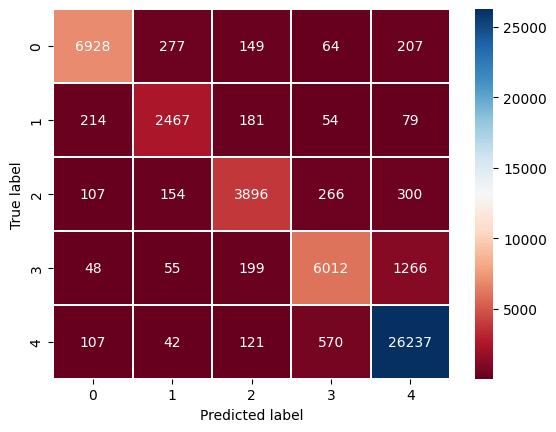

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Print classification report for ensemble model
target_names = ['1 Star', '2 Star', '3 Star','4 Star','5 Star']
print(classification_report(true_labels, predictions, target_names=target_names))

cm = confusion_matrix(true_labels, predictions)
print("Confusion matrix:\n", cm)
# corr, linewidths=.3, cmap="RdBu", annot=True, fmt=""
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', linewidths=.2, cmap='RdBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
x = list(range(1, epochs+1))
losses = []
accuracies = []

for epoch in range(epochs):
    # Training loop
    for batch in training_data:
        # Perform training steps
        loss, accuracy = model.train_step(batch)
        # Append the loss and accuracy to the respective lists
        losses.append(loss)
        accuracies.append(accuracy)

# Plotting the training history
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(x, losses, marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Training Loss")

ax[1].plot(x, accuracies, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Training Accuracy")

plt.tight_layout()
plt.show()


AttributeError: ignored

# Original

In [ ]:
# x = list(range(1, n_epochs+1))
# metric_list = list(model_fit.history.keys())
# num_metrics = int(len(metric_list)/2)

# fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

# for i in range(0, num_metrics):
#   ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
#   ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
#   ax[i].set_xlabel("epochs",fontsize=14)
#   ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
#   ax[i].legend(loc="lower left")